In [ ]:
class Species {
    id: number;
    level: number;
    prey: Species[];
    
    constructor(id: number, level: number, prey: Species[] = []) {
        this.id = id;
        this.level = level;
        this.prey = prey;
    }
}

class Ecosystem {
    levels: Species[][];
    speciationRate: number;
    extinctionProbability: number;
    nextId: number;
    history: { step: number, speciesCount: number }[];
    
    constructor(numLevels: number, nichesPerLevel: number, speciationRate: number, extinctionProbability: number) {
        this.levels = Array.from({ length: numLevels }, () => []);
        this.speciationRate = speciationRate;
        this.extinctionProbability = extinctionProbability;
        this.nextId = 1;
        this.history = [];
        
        // 초기 종 생성
        for (let i = 0; i < nichesPerLevel; i++) {
            this.levels[0].push(new Species(this.nextId++, 0));
        }
    }
    
    // 새로운 종 생성 (Origination)
    originate() {
        for (let level = 0; level < this.levels.length; level++) {
            if (Math.random() < this.speciationRate) {
                let preyLevel = level - 1;
                let prey = preyLevel >= 0 ? this.getRandomPrey(preyLevel) : [];
                this.levels[level].push(new Species(this.nextId++, level, prey));
            }
        }
    }
    
    // 멸종 과정 (Extinction)
    extinction() {
        this.levels[0] = this.levels[0].filter(() => Math.random() > this.extinctionProbability);
        
        for (let level = 1; level < this.levels.length; level++) {
            this.levels[level] = this.levels[level].filter(species => species.prey.some(prey => this.levels[prey.level].includes(prey)));
        }
    }
    
    // 주어진 레벨에서 랜덤한 먹이 선택
    getRandomPrey(level: number): Species[] {
        return this.levels[level].length ? [this.levels[level][Math.floor(Math.random() * this.levels[level].length)]] : [];
    }
    
    // 시뮬레이션 실행
    runSimulation(steps: number) {
        for (let i = 0; i < steps; i++) {
            this.originate();
            this.extinction();
            this.history.push({ step: i + 1, speciesCount: this.getTotalSpecies() });
            // console.log(`Step ${i + 1}: Total species = ${this.getTotalSpecies()}`);
        }
    }
    
    getTotalSpecies(): number {
        return this.levels.reduce((sum, level) => sum + level.length, 0);
    }
}

In [ ]:
const ecosystem = new Ecosystem(6, 50, 0.08, 0.01);
ecosystem.runSimulation(1000);

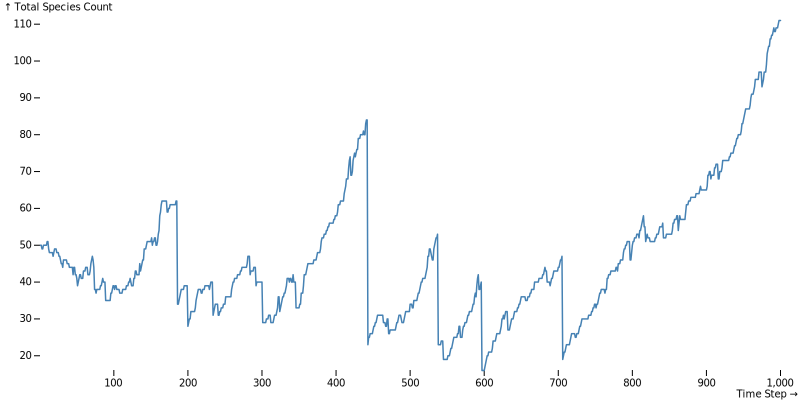

In [ ]:
import { document } from "jsr:@ry/jupyter-helper@0.2.0"
import * as Plot from "https://esm.sh/@observablehq/plot@0.6.17"

Plot.plot({
    marks: [
        Plot.line(ecosystem.history, { x: "step", y: "speciesCount", stroke: "steelblue" })
    ],
    width: 800,
    height: 400,
    x: { label: "Time Step" },
    y: { label: "Total Species Count" },
    color: { legend: true },
    document,
})